# Содержание

1. [Изучение общих данных](#start)     
    1.1. [Вывод](#start_result)   
2. [Предобработка данных](#pre)   
    2.1. [Удаление столбцов](#pre_col)   
    2.2. [Типы данных](#pre_type)   
    2.3. [Проверка на дубликаты](#pre_duplicates)   
    2.4. [Проверка данных](#pre_data)   
    2.5. [Подготовка данных к анализу](#pre_add)   
    2.6. [Выводы](#pre_result)   
3. [Анализ данных](#analys)   
4. [Проверка гипотез](#hyp)    
    4.1. [Первая гипотеза](#hyp1)   
    4.2. [Вторая гипотеза](#hyp2)   
5. [Общий вывод](#result)   

# Определение перспективного тарифа для телеком-компании

Компания "Мегалайн" - федеральный оператор сотовой связи. Компания предлагает два тарифных плана "Смарт" и "Ультра". 

**Тариф «Смарт»**
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля; 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**
- «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
- Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


**Цель проекта** - определить, какой из двух тарифов приносит больше денег. А также проверить две **гипотезы**:
1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение общих данных
<a id='start'></a>
Откроем исходные файлы и ознакомимся с данными.

In [1]:
import pandas as pd                        # импорт библиотеки pandas
import numpy as np                         # импорт библиотеки numpy
from scipy import stats as st              # импорт модуля stats из библиотеки scipy

import matplotlib.pyplot as plt            # импорт модуля pyplot библиотеки matplotlib
import math                                # импорт библиотеки math

pd.set_option('display.max_columns', None) # вывод всех столбцов таблицы
pd.set_option('display.max_rows', None)    # вывод всех строк
pd.set_option('display.float_format', '{:,.2f}'.format)
%config InlineBackend.figure_format = 'retina' # улучшение качество графиков

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')       # чтение файла calls.csv и сохранения ее в переменную df_calls
df_internet = pd.read_csv('/datasets/internet.csv') # чтение файла internet.csv и сохранения ее в переменную df_internet
df_messages = pd.read_csv('/datasets/messages.csv') # чтение файла messages.csv и сохранения ее в переменную df_messages
df_tariffs = pd.read_csv('/datasets/tariffs.csv')   # чтение файла tariffs.csv и сохранения ее в переменную df_tariffs
df_users = pd.read_csv('/datasets/users.csv')       # чтение файла users.csv и сохранения ее в переменную df_users

display('Calls', df_calls.head(10), df_calls.info())          # вывод на экран первых 10 строк таблицы и общей информации
display('Internet', df_internet.head(10), df_internet.info()) # вывод на экран первых 10 строк таблицы и общей информации
display('Messages', df_messages.head(10), df_messages.info()) # вывод на экран первых 10 строк таблицы и общей информации
display('Tariffs', df_tariffs.head(10), df_tariffs.info())    # вывод на экран первых 10 строк таблицы и общей информации
display('Users', df_users.head(10), df_users.info())          # вывод на экран первых 10 строк таблицы и общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


'Calls'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


'Internet'

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


'Messages'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


'Tariffs'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


'Users'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


None

1. В таблице `df_calls` содержится информация о звонках:
- `id` — уникальный номер звонка;
- `call_date` — дата звонка;
- `duration` — длительность звонка в минутах;
- `user_id` — идентификатор пользователя, сделавшего звонок.

Пропущенных значений нет. Названия столбцов корректны. Столбец с датой `call_date` требует изменения типа на `datetime`.

2. В таблице `df_internet` содержится информация об интернет-сессиях:
- `id` — уникальный номер сессии;
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
- `session_date` — дата интернет-сессии;
- `user_id` — идентификатор пользователя.

Пропущенных значений нет. Названия столбцов корректны. Есть столбец `Unnamed: 0`, повторяющий индексы таблицы, его стоит удалить. Столбец с датой `session_date` требует изменения типа на `datetime`.

3. В таблице `df_messages` содержится информация о сообщениях:
- `id` — уникальный номер сообщения;
- `message_date` — дата сообщения;
- `user_id` — идентификатор пользователя, отправившего сообщение.

Пропущенных значений нет. Названия столбцов корректны. Столбец с датой `message_date` требует изменения типа на `datetime`.

4. В таблице `df_tariffs` содержится информация о тарифах:
- `tariff_name` — название тарифа;
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

Пропущенных значений нет. Названия столбцов корректны. Типы данных во всех столбцах корректные.

5. В таблице `df_users` содержится информация о пользователях:
- `user_id` — уникальный идентификатор пользователя;
- `first_name` — имя пользователя;
- `last_name` — фамилия пользователя;
- `age` — возраст пользователя (годы);
- `reg_date` — дата подключения тарифа (день, месяц, год);
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
- `city` — город проживания пользователя;
- `tariff` — название тарифного плана.

Много пропущенных данных в столбце `churn_date`, что не является ошибкой, а свидтельствует, что тариф еще действует. Названия столбцов корректны. Столбцы с датой `churn_date` и `reg_date` требуют изменения типа на `datetime`.

### Вывод
<a id='start_result'></a>
1. Данные в таблицах связаны между собой по `user_id`. Однако соединять таблицы между собой не имеет смысла, поскольку данные между собой не связаны и имеют разное количество строк.
2. Необходимо удалить столбец `Unnamed: 0` из `df_internet`, а также изменить тип данных на `datetime` для всех столбцов с датами.

## Предобработка данных
<a id='pre'></a>

### Удаление столбцов
<a id='pre_col'></a>

Удалим столбец `Unnamed: 0` из таблицы `df_internet`.

In [3]:
df_internet.drop(columns='Unnamed: 0', inplace=True) # удаляем столбец Unnamed: 0 в df_internet
df_internet.info()                                   # вывод информации о df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


### Типы данных
<a id='pre_type'></a>
Изменим тип данных на `datetime` в столбцах:
- `call_date` в таблице `df_calls`;
- `session_date` в таблице `df_internet`; 
- `message_date` в таблице `df_messages`;
- `churn_date` в таблице `df_users`; 
- `reg_date` в таблице `df_users`.

In [4]:
# заменяем тип данных столбца call_date таблицы df_calls на datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
# заменяем тип данных столбца session_date таблицы df_internet на datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
# заменяем тип данных столбца message_date таблицы df_messages на datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
# заменяем тип данных столбца churn_date таблицы df_users на datetime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
# заменяем тип данных столбца reg_date таблицы df_users на datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

display(df_calls.dtypes,    # выводим на экран типы данных измененных таблиц
        df_internet.dtypes,
        df_messages.dtypes,
        df_users.dtypes)

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

### Проверка на дубликаты
<a id='pre_duplicates'></a>
Проверим наши таблицы на явные повторы (кроме таблицы с тарифами `df_tariffs` - там всего две строчки).

In [5]:
display(df_calls.duplicated().sum(),
        df_internet.duplicated().sum(),
        df_messages.duplicated().sum(),
        df_users.duplicated().sum())

0

0

0

0

Таблицы с данными по звонкам `df_calls`, интернету `df_internet`, сообщениям `df_messages` и пользователям `df_users` явных повторов не содержат.

### Проверка данных
<a id='pre_data'></a>

Проверим наши данные на корректность значений. Уточним долю пропущенных звонков (где значение `duration` равно нулю).

In [6]:
df_calls.query('duration == 0')['duration'].count() / len(df_calls) # доля пропущенных звонков

0.19551644316336553

Доля пропущенных звонков - 20%. Учтем это, при анализе.  
Проверим длительность звонков на выбросы значений, исключив пропущенные вызовы.

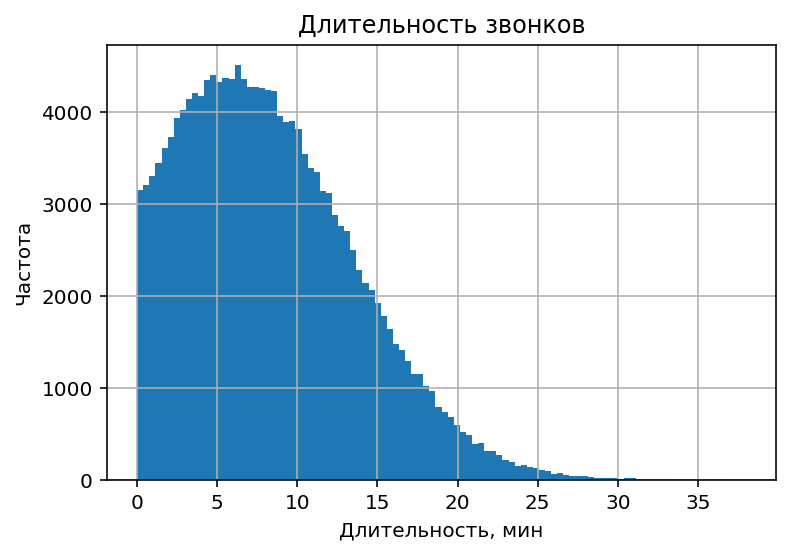

In [7]:
df_calls.query('duration != 0').hist('duration', bins=100) # гистограмма для duration в df_calls
plt.title('Длительность звонков')
plt.xlabel('Длительность, мин')
plt.ylabel('Частота')
plt.show()

Длительность звонков не более 40 минут, в основном в пределах 12 минут. Данные распределены нормально с учетом отсутствия значений меньше нуля.  
Проверим период данных по звонкам `df_calls`.

In [8]:
display(df_calls['call_date'].min(),                           # минимальное значение call_date в df_calls
        df_calls['call_date'].max())                           # максимальное значение call_date в df_calls
df_calls['call_date'].max() - df_calls['call_date'].min()      # суммарное количество дней

Timestamp('2018-01-01 00:00:00')

Timestamp('2018-12-31 00:00:00')

Timedelta('364 days 00:00:00')

Данные взяты за период с января по декабрь 2018 года.  

Проверим долю тех, кто не пользуется интернетом.

In [9]:
df_internet.query('mb_used == 0')['mb_used'].count() / len(df_internet) # доля нулевого интернет-траффика

0.13118155773916304

Доля таких пользователей - 13%. Учтем это при анализе.  
Проверим объем потраченного за сессию интернет-трафика на выбросы значений, исключив нулевые значения.

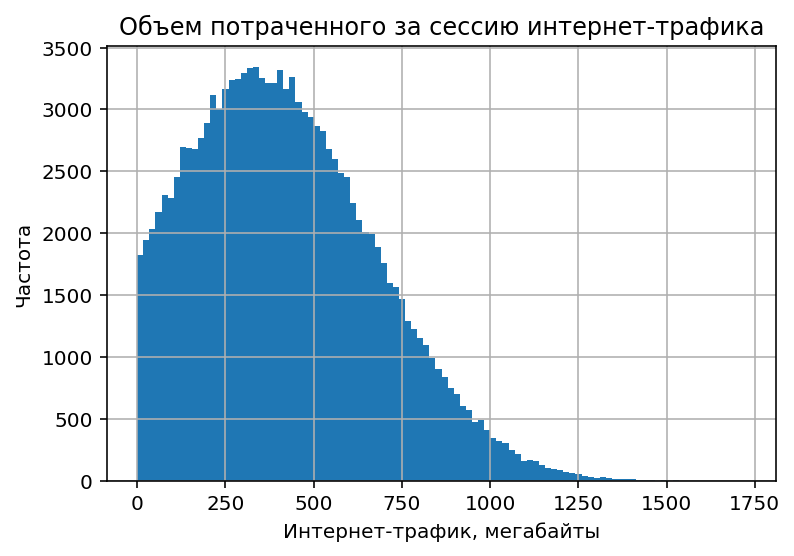

In [10]:
df_internet.query('mb_used != 0').hist('mb_used', bins=100) # гистограмм для mb_used в df_internet
plt.title('Объем потраченного за сессию интернет-трафика')
plt.xlabel('Интернет-трафик, мегабайты')
plt.ylabel('Частота')
plt.show()

Объем интернет-траффика не превышает 2ГБ за сессию, в основном до 700Мб.  
Проверим период данных по интернет сессиям `session_date`.

In [11]:
display(df_internet['session_date'].min(),                            # минимальное значение session_date в df_internet
        df_internet['session_date'].max())                            # максимальное значение session_date в df_internet
df_internet['session_date'].max() - df_internet['session_date'].min() # суммарное количество дней

Timestamp('2018-01-01 00:00:00')

Timestamp('2018-12-31 00:00:00')

Timedelta('364 days 00:00:00')

Данные также взяты за период с января по декабрь 2018 года. Проверим период данных по отправке сообщений `message_date`.

In [12]:
display(df_messages['message_date'].min(),                            # минимальное значение message_date в df_messages
        df_messages['message_date'].max())                            # максимальное значение message_date в df_messages
df_messages['message_date'].max() - df_messages['message_date'].min() # суммарное количество дней

Timestamp('2018-01-02 00:00:00')

Timestamp('2018-12-31 00:00:00')

Timedelta('363 days 00:00:00')

Данные также взяты за период с января по декабрь 2018 года.

Проверим таблицу `df_users` дополнительно на совпадения имени и фамилии пользователей. Проверим столбец с именами `first_name` на отсутствие повторов в связи с разным написанием имен.

In [13]:
df_users['first_name'].value_counts().sort_index(ascending=True) # список уникальных имен first_name и их количество

Авксентий     3
Агата         1
Агафья        2
Агнесса       2
Адам          4
Аким          1
Аксён         2
Алан          2
Алевтина      2
Александр     4
Александра    3
Алексей       2
Алина         2
Алиса         4
Алла          3
Альберта      2
Альбин        3
Альфред       2
Алёна         1
Анатолий      2
Анвар         2
Ангелина      1
Андрей        4
Анжелика      1
Анита         1
Антонина      3
Анфиса        1
Арина         3
Арнольд       1
Арсен         2
Арсений       2
Артемий       2
Артём         4
Аурелия       3
Афанасий      2
Ахмет         2
Аюна          2
Белла         1
Берта         1
Борис         2
Вадим         3
Валентина     2
Валерий       3
Валерия       2
Варвара       1
Варлам        1
Василиса      3
Вениамин      3
Вера          3
Вероника      2
Веселина      4
Виктор        1
Виктория      3
Виолетта      1
Виталий       1
Владимир      2
Владислав     3
Владислава    1
Всеволод      4
Габриель      4
Габриэль      2
Гайдар        3
Галина  

Имена написаны корректны. Проверим совпадение имен `first_name` и фамилий `last_name`.

In [14]:
df_users.duplicated(subset=['first_name', 'last_name']).sum() # дубликаты по first_name last_name в df_users

0

Повторений нет. Это свидетельствует в пользу корректности выборки.  
Посмотрим на значения возраста `age` пользователей.

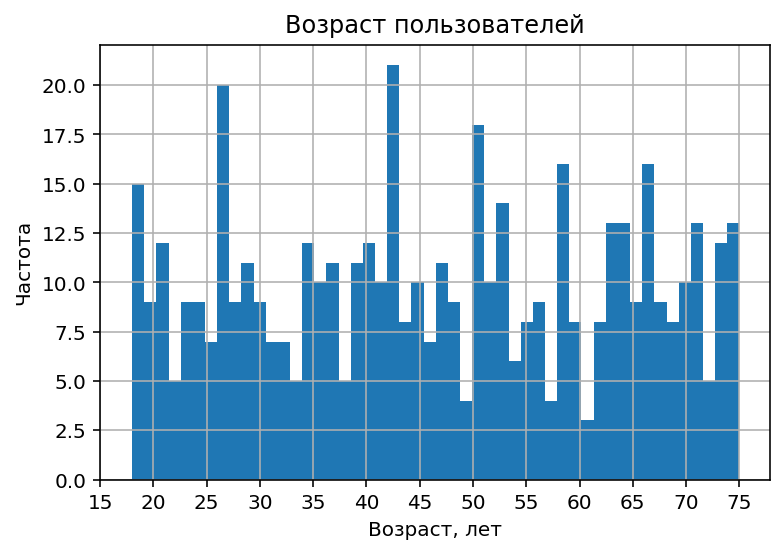

In [15]:
df_users['age'].hist(bins=50)          # гистограмма age в df_users
plt.title('Возраст пользователей')
plt.xlabel('Возраст, лет')
plt.ylabel('Частота')
plt.xticks(ticks=np.arange(15, 80, 5))
plt.show()

Все пользователи в возрасте от 18 до 75 лет, распределены примерно равномерно в рамках десятилетий.

In [16]:
display(df_users['reg_date'].min(),                     # минимальное значение message_date в df_messages
        df_users['reg_date'].max())                     # максимальное значение message_date в df_messages
df_users['reg_date'].max() - df_users['reg_date'].min() # суммарное количество дней

Timestamp('2018-01-01 00:00:00')

Timestamp('2018-12-31 00:00:00')

Timedelta('364 days 00:00:00')

Теперь посмотрим на количество дней пользования тарифом для тех пользователей, кто сменил тариф.

In [17]:
# считаем разницу между датой подключения тарифа reg_date и датой прекращения churn_date
df_users[~ df_users['churn_date'].isna()]['churn_date'] - df_users[~ df_users['churn_date'].isna()]['reg_date']

19    142 days
20     57 days
34     87 days
50    109 days
51    139 days
56    184 days
62     23 days
63    243 days
64    284 days
65    276 days
71    234 days
90     53 days
128     8 days
161   127 days
163    43 days
191    95 days
201   119 days
206    47 days
232    54 days
242    33 days
254   225 days
255   195 days
265   102 days
271   122 days
293    78 days
343    74 days
353   218 days
355   129 days
367    63 days
370   263 days
371     5 days
392   212 days
399    49 days
416   151 days
422    70 days
438    80 days
480   224 days
498    98 days
dtype: timedelta64[ns]

Есть пользователи, которые пользовались тарифом всего несколько дней. Посчитаем также, сколько человек подулючились после 10 января 2018.

In [18]:
df_users[df_users['reg_date'] > '2018-12-10']['user_id'].count()

23


Удалим всех тех, кто пользовался тарифом менее 10 дней из выборки, т.к. нас интересует анализ помесячного пользования тарифами.

In [19]:
# оставляем в df_users тех пользователей, кто пользовался тарифом более 20 дней
df_users = df_users[((df_users['churn_date'].isna() 
                     | ((df_users['churn_date'] - df_users['reg_date']) > '10 days')) 
                     & ( df_users['reg_date'] < '2018-12-20'))]\
          .reset_index(drop=True)
df_users.shape # проверяем количество удаленных строк

(486, 8)

Проверим разброс городов `city` в выборке `df_users` и их повторения.

In [20]:
df_users['city'].value_counts().sort_index(ascending=True) # выводим значения city в df_users

Архангельск          1
Астрахань            4
Балашиха             5
Барнаул              3
Белгород             2
Брянск               3
Владивосток          5
Владикавказ          2
Владимир             3
Волгоград            8
Волжский             1
Вологда              7
Воронеж              5
Грозный              2
Екатеринбург        11
Иваново              1
Ижевск               2
Иркутск              6
Казань              14
Калининград          2
Калуга               4
Кемерово             2
Киров                4
Кострома             4
Краснодар           10
Красноярск           7
Курган               3
Курск                2
Липецк               2
Магнитогорск         5
Махачкала            5
Москва              97
Мурманск             4
Набережные Челны    11
Нижневартовск        1
Нижний Новгород      8
Нижний Тагил         3
Новокузнецк          6
Новороссийск         4
Новосибирск         14
Омск                13
Оренбург             2
Орёл                 3
Пенза      

Разброс городов и отсутствие повторов также говорят в пользу выборки.

Посмотрим распределение тарифов `tariff` внутри выборки `df_users`.

In [21]:
df_users['tariff'].value_counts()

smart    341
ultra    145
Name: tariff, dtype: int64

Тариф smart популярнее тарифа ultra более чем в 2 раза. Учтем это при анализе.

### Подготовка данных к анализу
<a id='pre_add'></a>

Для последующего анализа подготовим сводную таблицу `df` для каждого пользователя `user_id` с указанием по месяцам `month`:
- количества сделанных звонков `calls` и израсходованных минут разговора `duration`;
- количества отправленных сообщений `messages`;
- объема израсходованного интернет-траффика `traffic`;
- выручки `proceeds`,
- названия тарифа `tariff` (и данных по тарифу).

Добавим в таблицы с данными по звонкам, интернету и сообщениям столбец с месяцем.

In [22]:
df_calls['month'] = df_calls['call_date'].dt.month_name()          # добавляем столбец month в df_calls
df_internet['month'] = df_internet['session_date'].dt.month_name() # добавляем столбец month в df_internet
df_messages['month'] = df_messages['message_date'].dt.month_name() # добавляем столбец month в df_messages

display(df_calls.dtypes,    # выводим на экран типы данных измененных таблиц
        df_internet.dtypes,
        df_messages.dtypes)

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
month                object
dtype: object

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
month                   object
dtype: object

id                      object
message_date    datetime64[ns]
user_id                  int64
month                   object
dtype: object

Теперь создадим сводную таблицу `df` для дальнейшего анализа.  

In [23]:
# сводная таблица df по user_id и month с количеством звонков calls и общей длительностью звонков duration 
df = df_calls.pivot_table('duration', ['user_id', 'month'], aggfunc=['count', 'sum'])\
             .set_axis(['calls', 'duration'], axis=1, inplace=False).reset_index()
# присоединяем к df данные объему траффика traffic по user_id и month
df = df.merge(df_internet.pivot_table('mb_used', ['user_id', 'month'], aggfunc=['sum'])\
           .set_axis(['traffic'], axis=1, inplace=False).reset_index(), on=['user_id', 'month'], how='outer')
# присоединяем к df данные по количеству сообщений messages по user_id и month
df = df.merge(df_messages.pivot_table('id', ['user_id', 'month'], aggfunc=['count'])\
           .set_axis(['messages'], axis=1, inplace=False).reset_index(), on=['user_id', 'month'], how='outer')
# присоединяем к df данные по названию тарифов tariff и city по user_id
df = df.merge(df_users[['user_id', 'tariff', 'city']], on='user_id', how='right')

df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'}) # переименовываем tariff_name в df_tariffs в tariff
df = df.merge(df_tariffs, on='tariff') # присоединяем к df данные по тарифам по tariff

df.head(10) #выводим первые 10 строчек таблицы

,user_id,month,calls,duration,traffic,messages,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,52.00,389.87,"14,055.93",81.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,December,46.00,312.98,"9,817.61",70.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,July,47.00,318.80,"14,003.64",75.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,June,43.00,158.90,"23,233.77",60.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,May,22.00,150.06,"2,253.49",22.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,November,43.00,319.04,"14,756.47",58.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,October,57.00,328.45,"14,702.49",73.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,September,58.00,440.14,"14,568.91",57.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
8,1003,August,55.00,355.67,"8,565.21",37.00,ultra,Москва,1000,30720,3000,1950,150,1,1
9,1003,December,108.00,755.50,"10,121.53",75.00,ultra,Москва,1000,30720,3000,1950,150,1,1


Теперь округлим минуты `duration` - в большую сторону, согласно правилам "Мегалайн".

In [24]:
def duration_ceil(data):                         # создаем функцию округления минут duration_ceil
    duration = data['duration']                  # переменная duration соответствует значению столбца duration
    return np.ceil(duration)                     # возвращаем округленное вверх значение duration
  
df['duration'] = df.apply(duration_ceil, axis=1) # применяем фунцкцию duration_ceil к df
df.head(10)                                      # выводим первые 10 строк таблицы

,user_id,month,calls,duration,traffic,messages,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,52.00,390.00,"14,055.93",81.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,December,46.00,313.00,"9,817.61",70.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,July,47.00,319.00,"14,003.64",75.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,June,43.00,159.00,"23,233.77",60.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,May,22.00,151.00,"2,253.49",22.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,November,43.00,320.00,"14,756.47",58.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,October,57.00,329.00,"14,702.49",73.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,September,58.00,441.00,"14,568.91",57.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
8,1003,August,55.00,356.00,"8,565.21",37.00,ultra,Москва,1000,30720,3000,1950,150,1,1
9,1003,December,108.00,756.00,"10,121.53",75.00,ultra,Москва,1000,30720,3000,1950,150,1,1


Теперь необходимо округилть значения использованного интернет-траффика `traffic`, согласно правилам "Мегалайн" - в большую сторону до 1024 Мб (1Гб). Далее будем испльзовать гигобайты.

In [25]:
def traffic_round(data):                        # создаем функцию округления объема интернет-траффика traffic_round 
    n = np.floor(data['traffic']/1024)               # переменная n считает количество использованных Гб
    if not data['traffic'] % 1024 == 0:         # если значение траффика - неполные Гб
        return (n+1)                            # возвращаем округленное вверх значение
    else:                                       # если нет
        return n                                # возвращаем значение

df['traffic'] = df.apply(traffic_round, axis=1) # применяем фунцкцию traffic_round к df
df.head(10)                                     # выводим первые 10 строк таблицы

,user_id,month,calls,duration,traffic,messages,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,52.00,390.00,14.00,81.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,December,46.00,313.00,10.00,70.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,July,47.00,319.00,14.00,75.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,June,43.00,159.00,23.00,60.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,May,22.00,151.00,3.00,22.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,November,43.00,320.00,15.00,58.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,October,57.00,329.00,15.00,73.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,September,58.00,441.00,15.00,57.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
8,1003,August,55.00,356.00,9.00,37.00,ultra,Москва,1000,30720,3000,1950,150,1,1
9,1003,December,108.00,756.00,10.00,75.00,ultra,Москва,1000,30720,3000,1950,150,1,1


Теперь добавим в таблицу `df` столбец с выручкой `proceeds` по каждому пользователю за каждый месяц.

In [26]:
def proceeds(data):   # создаем функцию определения выручки за месяц proceeds
    over_minutes = 0  # стоимость доп минут - ноль, в рамках лимита по тарифу
    over_gb = 0       # стоимость доп Гб - ноль, в рамках лимита по тарифу
    over_messages = 0 # стоимость доп сообщений - ноль, в рамках лимита по тарифу
    if data['duration'] > data['minutes_included']:                                              # если есть доп минуты
        over_minutes = (data['duration'] - data['minutes_included']) * data['rub_per_minute']    # стоимость доп минут
    if data['traffic'] > (data['mb_per_month_included'] / 1024):                                 # если есть доп Гб
        over_gb = (data['traffic'] - data['mb_per_month_included'] / 1024) * data['rub_per_gb']  # стоимость доп Гб
    if data['messages'] > data['messages']:                                                      # если есть доп сообщения
        over_messages = (data['messages'] - data['messages_included']) * data['rub_per_message'] # стоимость доп сообщений
    return data['rub_monthly_fee'] + over_minutes + over_gb + over_messages                      # итоговая сумма

df['proceeds'] = df.apply(proceeds, axis=1) # применяем функцию proceeds к df
df.info()                                   # выведем информацию о таблице df
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 0 to 3201
Data columns (total 16 columns):
user_id                  3202 non-null int64
month                    3202 non-null object
calls                    3162 non-null float64
duration                 3162 non-null float64
traffic                  3191 non-null float64
messages                 2707 non-null float64
tariff                   3202 non-null object
city                     3202 non-null object
messages_included        3202 non-null int64
mb_per_month_included    3202 non-null int64
minutes_included         3202 non-null int64
rub_monthly_fee          3202 non-null int64
rub_per_gb               3202 non-null int64
rub_per_message          3202 non-null int64
rub_per_minute           3202 non-null int64
proceeds                 3202 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 425.3+ KB


,user_id,month,calls,duration,traffic,messages,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceeds
0,1000,August,52.00,390.00,14.00,81.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1,"1,950.00"
1,1000,December,46.00,313.00,10.00,70.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1,"1,950.00"
2,1000,July,47.00,319.00,14.00,75.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1,"1,950.00"
3,1000,June,43.00,159.00,23.00,60.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1,"1,950.00"
4,1000,May,22.00,151.00,3.00,22.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1,"1,950.00"


### Выводы
<a id='pre_result'></a>
1. В сводной таблице содержатся данные о 486 пользователях в период за 2018 год.
2. Выборка пользователей похожа на случайную.
3. Данные содержат основную информацию о пользовании услуг клиентами.

## Анализ данных
<a id='analys'></a>

Оценим поведение пользователей каждого тарифа в месяц:
- требуемые минуты разговора;
- необходимый объем интернет-траффика;
- требуемое количество сообщений.

Для каждого параметра посчитаем также  среднее количество, дисперсию и стандартное отклонение. И построим гистограммы.

In [27]:
# таблица с основными показателями по duration, traffic, messages 
df.groupby('tariff')[['duration','traffic' ,'messages']].agg(['median', 'var', 'std']).astype('int')  

duration             traffic         messages          
         median    var  std  median var std   median   var std
tariff                                                        
smart       398  32077  179      17  32   5       33   717  26
ultra       498  84133  290      19  94   9       51  2101  45

Для удобства разделим нашу таблицу на две, в зависимости от используемого тарифа.

In [28]:
# таблица df_smart с основными данными по тарифу smart
df_smart = df.query('tariff in "smart"')\
             .groupby('user_id')['duration','traffic' ,'messages', 'proceeds'].agg('median')\
             .reset_index()

# таблица df_ultra с основными данными по тарифу ultra
df_ultra = df.query('tariff in "ultra"')\
             .groupby('user_id')['duration','traffic' ,'messages', 'proceeds'].agg('median')\
             .reset_index()

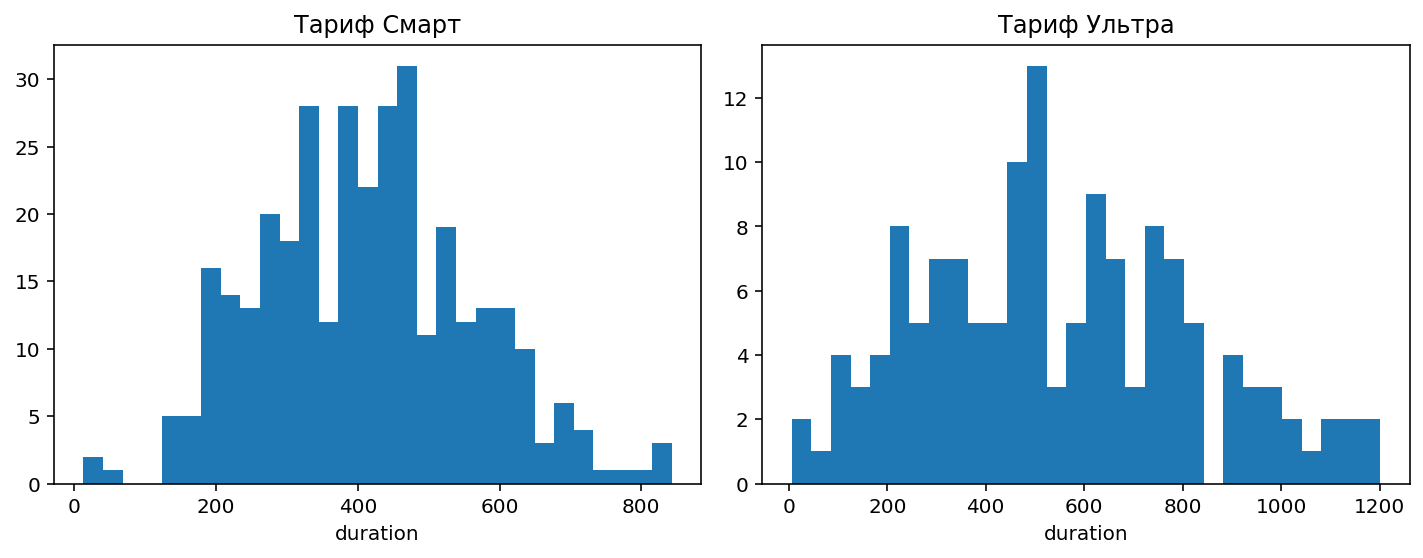

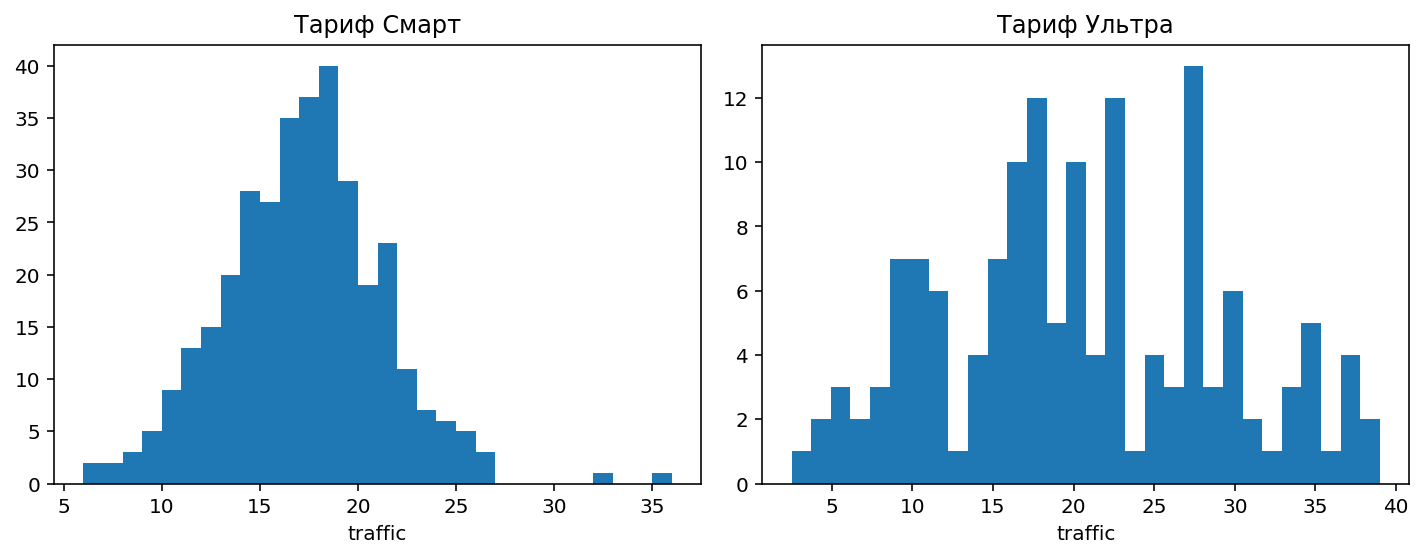

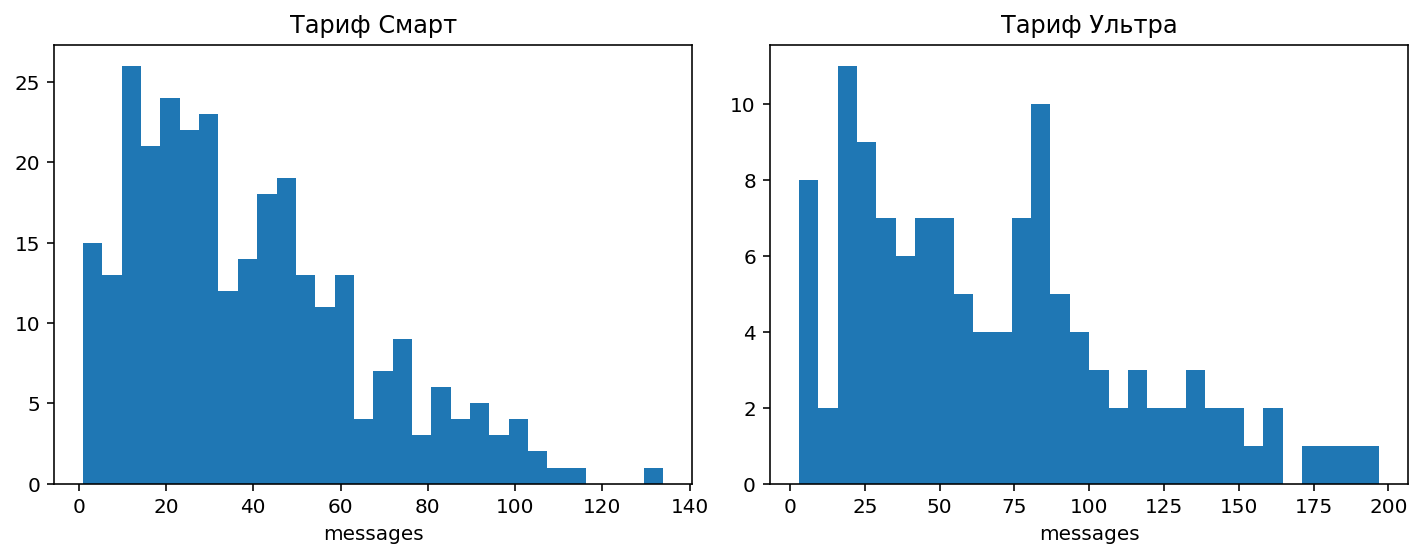

In [29]:
for index in range(1,4):                       # для данных duration, traffic, messages
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.hist(df_smart.iloc[:, index], bins=30) # строим гистограммы для тарифа smart
    ax1.set_title('Тариф Смарт')
    ax1.set_xlabel(df_smart.columns[index])
    ax2.hist(df_ultra.iloc[:, index], bins=30) # строим гистограммы для тарифа ultra
    ax2.set_title('Тариф Ультра')
    ax2.set_xlabel(df_ultra.columns[index])
    fig.tight_layout()
    plt.show()

**Выводы:**

*Длительность разговоров:*
- Среднее время вызовов за месяц на обоих тарифах отличаются всего на 100 мин. - не так сильно как лимиты в пакетах. На тарифе "Cмарт" длительность составляет 417 мин. (лимит 500 мин.) и на тарифе "Ультра" - 514 мин.(лимит 3000). 
- Длительность вызовов рапределена нормально. Можно говорить о том, что 95% пользователей укладывается в диапазон 117-717 минут на тарифе "Смарт" (т.е. с превышением лимита) и в диапазон 40-1068 минут на тарифе "Ультра" (т.е. с запасом более 200%).

*Объем интернет-траффика:*
- Средний объем использованного интернет-траффика в месяц также примерно одинаковый. Для тарифа "Смарт" - 17Гб (лимит 15 Гб) и 20Гб для тарифа "Ультра" (30Гб). БОльшенству на тарифе "Смарт" приходится ежемесячно доплачивать за использованный интернет-траффик.
- Распределение интернет-траффика близко к нормальному. Хотя для тарифа "Ультра" более широкое распределение. 95% пользователей используют в месяц 9-25 Гб на тарифе "Смарт" и 4-36 Гб на тарифе "Ультра". Превышение лимитов случается на обоих тарифах, но на тарифе "Смарт" намного чаще.

*Количество отправленных сообщений:*
- Среднее количество сообщений в месяц на тарифах "Смарт" и "Ультра" отличаются почти в 2 раза. Для тарифа "Смарт" это 35 сообщений (при лимите 50) и на тарифе "Ультра" 65 сообщений (при лимите 1000).
- Распределение количества отправленных сообщений по обоим тарифам близко к нормальному, скошенному влево. Что свидетельствует о меньшей непопулярности такого вида связи. 95% пользователей ежемесячно отправляют до 86 сообщений на тарифе "Смарт" и до 153 сообщений на тарифе "Ультра", что свидетельствует о частом привышении лимитов на тарифе "Смарт" и огромнейшем запасе сообщений на тарифе "Ультра".

## Проверка гипотез
<a id='hyp'></a>

Теперь необходимо проверить две гипотезы. Для каждой сформулируем нулевую (о равенстве средних) и альтернативную гипотезы, а также уровень значимости.  

Посчитаем p-value для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.


### Первая гипотеза
<a id='hyp1'></a>


**"Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются".**

Сформулируем нулевую и альтернативную гипотезы для односторонней проверки, ведь цель - узнать, какой тариф приносит больше дохода. 

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средняя выручка пользователей тарифов "Ультра" и "Смарт" одинаковы.}\\
   H_1 :\text{Средняя выручка пользователей тарифа "Ультра" больше тарифа "Смарт".}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Проверим нормальность распределения при помощи QQ-графиков.

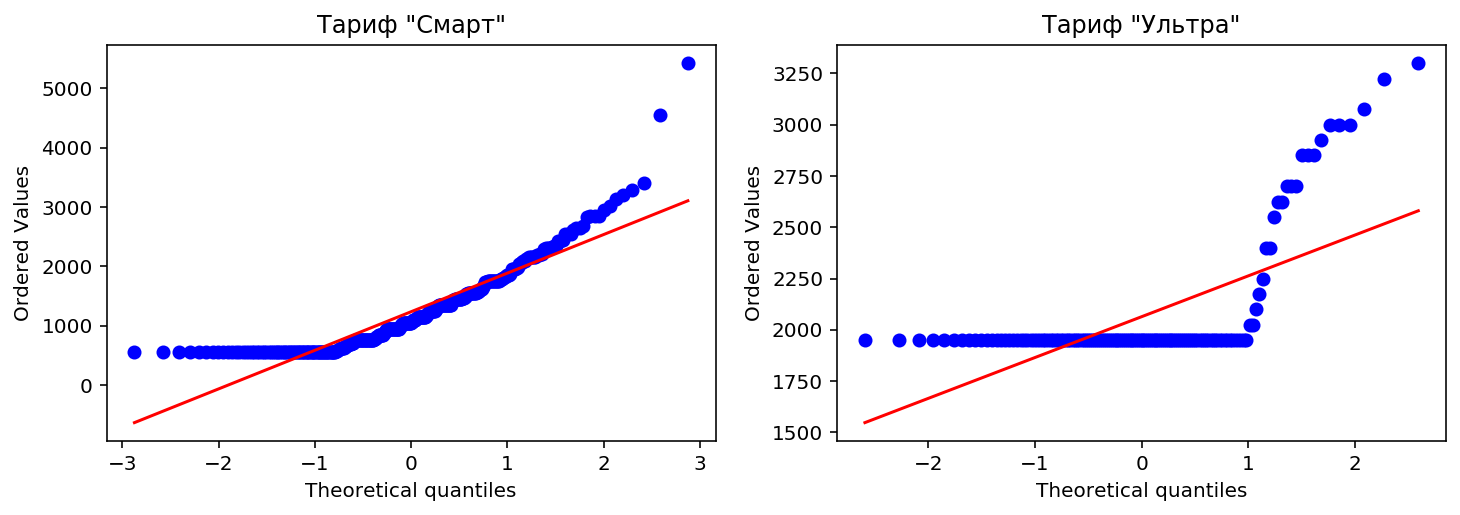

In [30]:
# строим qq-plot для нормального распределения
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df_smart['proceeds'], dist="norm", plot=plt) # для proceeds тарифа smart
plt.title('Тариф "Смарт"')
plt.subplot(2,2,2)
st.probplot(df_ultra['proceeds'], dist="norm", plot=plt) # для proceeds тарифа ultra
plt.title('Тариф "Ультра"')
plt.show()

Распределение данных по выручке на тарифе "Смарт" - не нормальное, на тарифе "Ультра" - нормальное.  Поэтому будем использовать в качестве оценки - критерий Манна-Уитни.

In [31]:
alpha = 0.05 # уровень значимости

results = st.mannwhitneyu(df_ultra['proceeds'], df_smart['proceeds'], alternative='greater') # критерий Манна-Уитни
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.218394483922458e-39
Отвергаем нулевую гипотезу


Сравним среднюю и общую выручку по тарифам.

In [32]:
print('Средняя выручка по тарифу "Смарт"', int(df_smart['proceeds'].mean()), 'руб.','\n'
      'Средняя выручка по тарифу "Ультра"', int(df_ultra['proceeds'].mean()), 'руб.','\n')

print('Общая выручка по тарифу "Смарт"', int(df_smart['proceeds'].sum()), 'руб.','\n'
      'Общая выручка по тарифу "Ультра"', int(df_ultra['proceeds'].sum()), 'руб.')

Средняя выручка по тарифу "Смарт" 1235 руб. 
Средняя выручка по тарифу "Ультра" 2063 руб. 

Общая выручка по тарифу "Смарт" 421150 руб. 
Общая выручка по тарифу "Ультра" 299250 руб.


**Вывод:**

На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативной. Средняя выручка пользователей тарифа "Ультра" больше, чем тарифа "Смарт".

### Вторая гипотеза
<a id='hyp2'></a>

**"Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".**

Сформулируем нулевую и альтернативную гипотезы для двухсторонней проверки.

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средняя выручка пользователей из Москвы и из других регионов одинаковы.}\\
   H_1 :\text{Средняя выручка пользователей из Москвы и из других регионов различаются.}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Проверим нормальность распределения при помощи QQ-графиков.

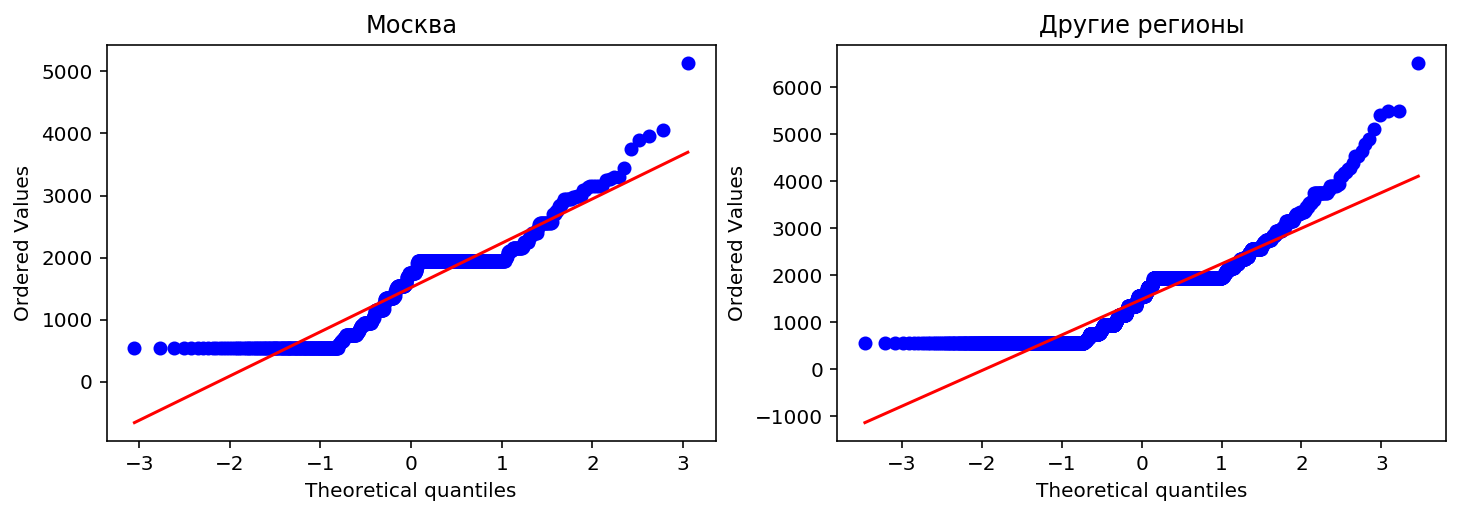

In [33]:
# строим qq-plot для нормального распределения
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df.query('city in "Москва"')['proceeds'], dist="norm", plot=plt)     # для proceeds по Москве
plt.title('Москва')
plt.subplot(2,2,2)
st.probplot(df.query('not city in "Москва"')['proceeds'], dist="norm", plot=plt) # для proceeds по другим регионам
plt.title('Другие регионы')
plt.show()

Оба распределения выручки по Москве и другим регионам - не нормальные. Поэтому будем использовать в качестве оценки - критерий Манна-Уитни.

In [34]:
alpha = 0.05 # уровень значимости

results = st.mannwhitneyu(df.query('city in "Москва"')['proceeds'],     # критерий Манна-Уитни
                          df.query('not city in "Москва"')['proceeds'],
                          alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.21145620734200632
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

На имеющихся данных, на уровне значимости 5% нет основания отвергнуть нулевую гипотезу. Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод
<a id='result'></a>
В настоящем проекте были проанализированы данные о пользователях двух тарифов компании "Мегалайн" в течение 2018 года - тарифа "Смарт" и тарифа "Ультра". Есть общие наблюдения:

- Пользователи тарифом "Смарт" чаще доплачивают за дополнительные минуты, гигобайты и сообщения. 
- Пользователей тарифом "Смарт" в 2,3 раза больше, чем пользователей тарифом "Ультра".

Проверка гипотез показала:
1. Гипотеза об отличии средней выручки пользователей двух тарифов подтвердилась. А точнее средняя выручка по тарифу "Ультра" выше, чем по тарифу "Смарт". И даже при условии, что пользователей тарифом "Смарт" по имеющейся случайной выборке существенно больше, общая вырука за год по тарифу "Ультра" больше, чем по тарифу "Смарт", примерно на 20%.
2. Гипотеза о разной средней выручке пользователей из Москвы и других регионов не подтвердилась. 